In [1]:
import numpy as np 
import pandas as pd

In [5]:
# Data Loading
df = pd.read_csv(r'/Users/sk/Library/Mobile Documents/com~apple~CloudDocs/3. Techno (Professional)/21. Prj2_Transformer based Comment analyzer Chrome Plugin/ Prj2_CodeFile/data/dataset.csv')

In [6]:
df.head()

,Unnamed: 0,clean_comment,category
0,0,family mormon have never tried explain them t...,1
1,1,buddhism has very much lot compatible with chr...,1
2,2,seriously don say thing first all they won get...,-1
3,3,what you have learned yours and only yours wha...,0
4,4,for your own benefit you may want read living ...,1


In [7]:
df.shape

(37249, 3)

In [8]:
df['clean_comment'][101]

'fun fact under the current fsi rules cities like ahmeadbad surat vadodra etc you will not find buildings residential commercial taller then 200ft the result this policy cities have grown horizontally then vertically ahmedabad from what was years ago now incorporates much bigger footprint '

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [36]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [42]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [44]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [46]:
 df.dropna(inplace = True)

In [48]:
df.isnull().sum()

clean_comment    0
category         0
dtype: int64

In [52]:
df.duplicated().sum()

350

In [54]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [56]:
df.drop_duplicates(inplace = True)

In [58]:
df.duplicated().sum()

0

In [71]:
# Checking which rows has empty comment
df[df['clean_comment'].str.strip() == '']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [75]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [79]:
# Converting everything to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()
df['clean_comment'][10]

' recently told family that buddhist live the bible belt this whole ordeal involved leaving the baptist church and everything been pretty rough but those who really care about have been open and accepting they seen the good has created life and relationships with others fact there are handful christians who have lovely conversations with and that truly respect someone else suggested living buddha living christ great one read about the important dialogue between buddhists and christians also welcome you message '

In [81]:
df.duplicated().sum()

0

In [83]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [85]:
# Removing trailing and leading whitespaces from clean_comment column
df['clean_comment'] = df['clean_comment'].str.strip()

In [89]:
# Checking trailing and leading whitespaces again
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category


In [99]:
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [105]:
# Removing \n from comments
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex = True)
df[df['clean_comment'].str.contains('\n')] # Checking again

,clean_comment,category


### EDA

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='category', ylabel='count'>

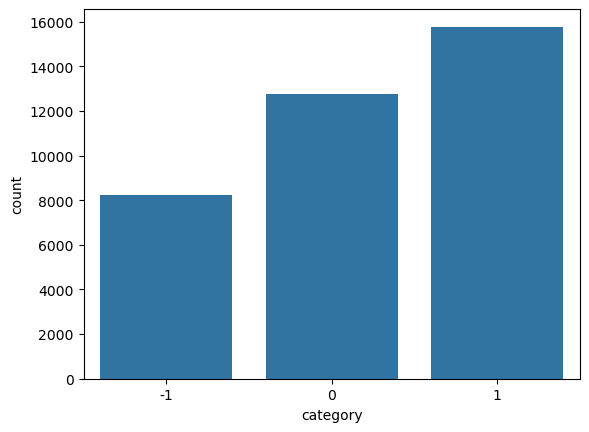

In [114]:
sns.countplot(data = df, x = 'category') # Countplot se pta chal rha ki imbalanced dataset hai apna

In [122]:
df['category'].value_counts()/df.shape[0]* 100 # Percentage of categories present in data

category
 1    42.864132
 0    34.713125
-1    22.422743
Name: count, dtype: float64

# WordCount

In [ ]:
# Adding a new column wordcount ki comment me kitna word hai so that relationship 
# dekh paaye ki lambe comment kahi jyada positiove ho asia kuch to nhi hai na
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [126]:
df.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [128]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

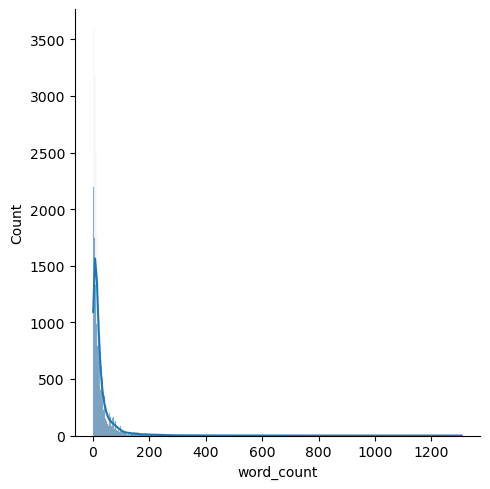

In [130]:
sns.displot(df['word_count'], kde = True) # Skewed distribution hai So outliers to hai

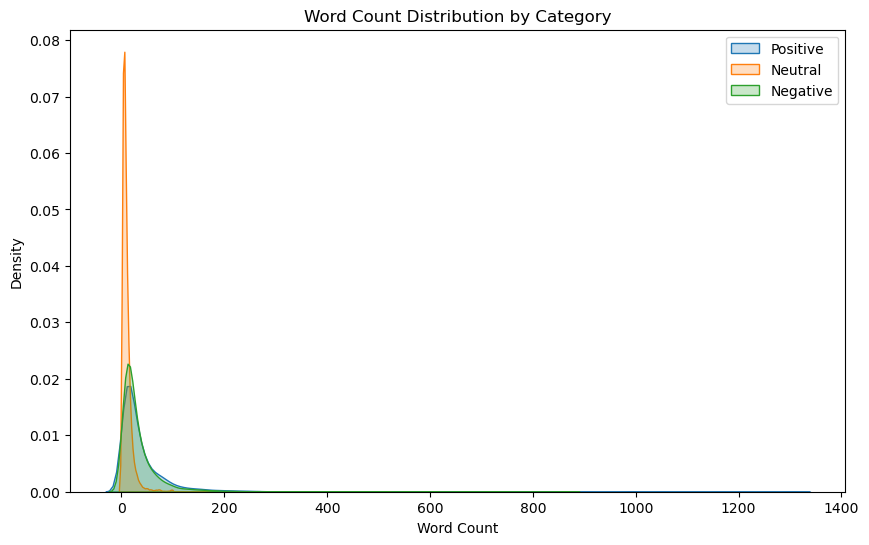

In [132]:
# Category wise displot of word_count
# create the figure and axes
plt.figure(figsize = (10,6))

#Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label = 'Positive', fill = True)

#Plot KDE for category 1
sns.kdeplot(df[df['category'] == 0]['word_count'], label = 'Neutral', fill = True)

#Plot KDE for category 1
sns.kdeplot(df[df['category'] == -1]['word_count'], label = 'Negative', fill = True)

# Add titles and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()
# Show the plot
plt.show()

- Neutral category -> isme bahut jyada rows me bahut kam word count hai
- Positive and negative me jyada number of words use hue hai in comments
  

<Axes: ylabel='word_count'>

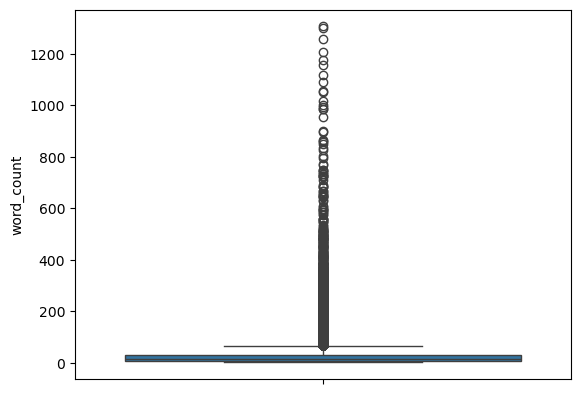

In [135]:
sns.boxplot(df['word_count'])

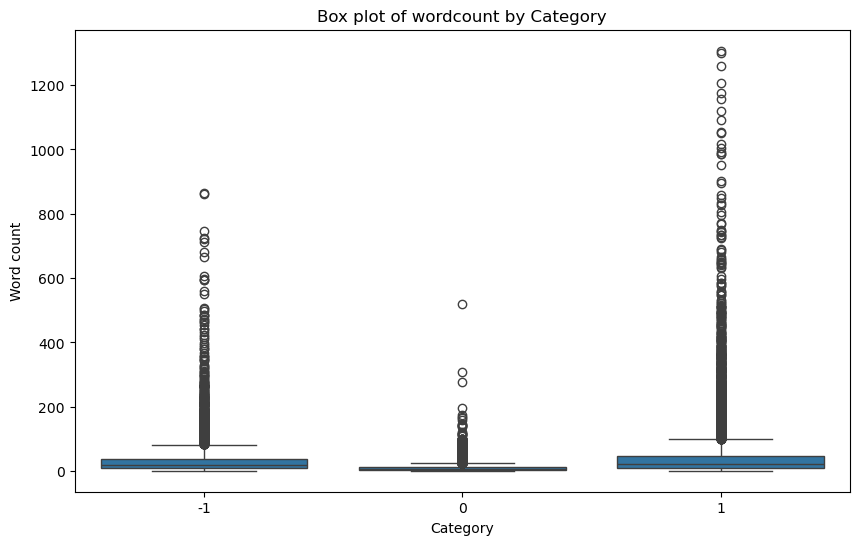

In [139]:
# Category wise boxplot of word_count
# create the figure and axes
plt.figure(figsize = (10,6))

sns.boxplot(data = df, x = 'category', y = 'word_count')

# Add titles and labels
plt.title('Box plot of wordcount by Category')
plt.xlabel('Category')
plt.ylabel('Word count')

# Show the plot
plt.show()

- positive wale and negative wale me many outliers are there
- Neutral wale ka iqr is less

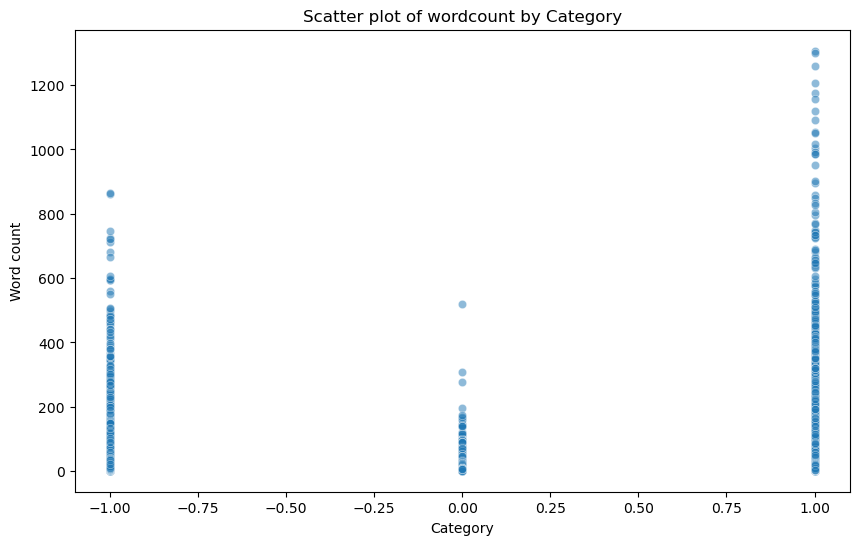

In [142]:
# Category wise Scatterplot of word_count
# create the figure and axes
plt.figure(figsize = (10,6))

sns.scatterplot(data = df, x = 'category', y = 'word_count', alpha = 0.5)

# Add titles and labels
plt.title('Scatter plot of wordcount by Category')
plt.xlabel('Category')
plt.ylabel('Word count')

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

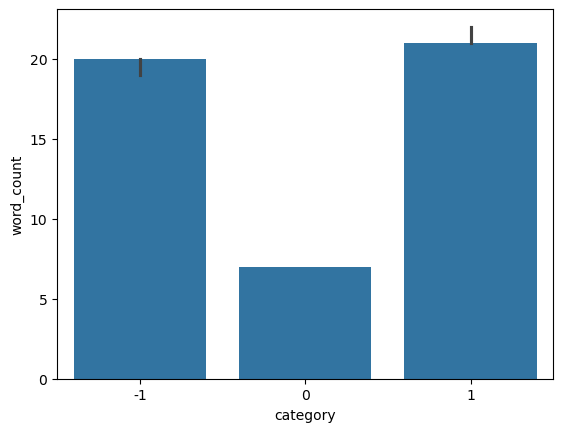

In [144]:
# Median word counts among sentiments
sns.barplot(df, x = 'category', y = 'word_count', estimator = 'median')

# Stopwords

In [146]:
!pip install nltk

In [150]:
from nltk.corpus import stopwords

# Download NLTK Stopwords if not already downloaded
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/sk/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [152]:
# Define the list of english stopwords
stop_words = set(stopwords.words('english'))

In [154]:
# create a new column 'num_stop_words' by counting the number of stopwords in eacj comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x:len([word for word in x.split() if word in stop_words]))

In [183]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
18039,modi coward and psychopath,0,4,1
5695,are you little kid something why you want aver...,-1,23,7
9788,they missed option packing bags for pakistan,0,7,2
679,for bjp still media discussing there any modi ...,0,9,3
1065,namoarmy fakr hai,0,3,0


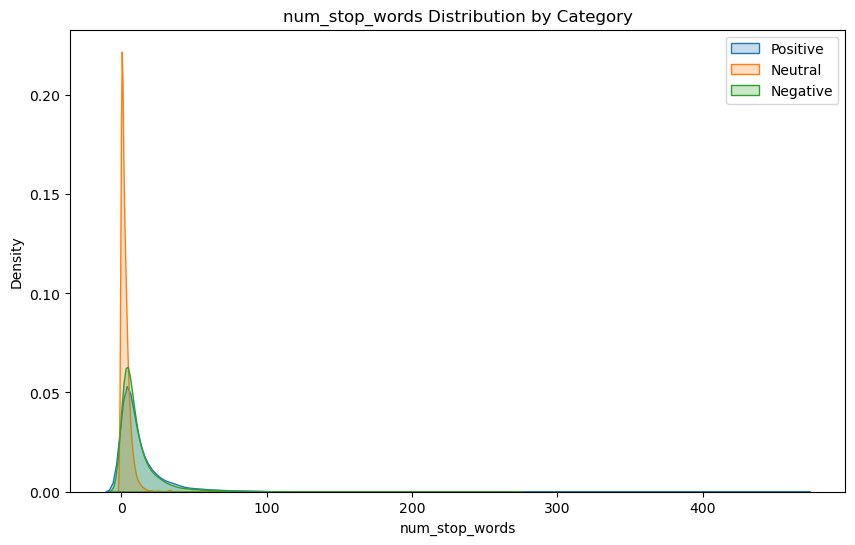

In [195]:
# Category wise displot of word_count
# create the figure and axes
plt.figure(figsize = (10,6))

#Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label = 'Positive', fill = True)

#Plot KDE for category 1
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label = 'Neutral', fill = True)

#Plot KDE for category 1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label = 'Negative', fill = True)

# Add titles and labels
plt.title('num_stop_words Distribution by Category')
plt.xlabel('num_stop_words')
plt.ylabel('Density')

# Add a legend
plt.legend()
# Show the plot
plt.show()

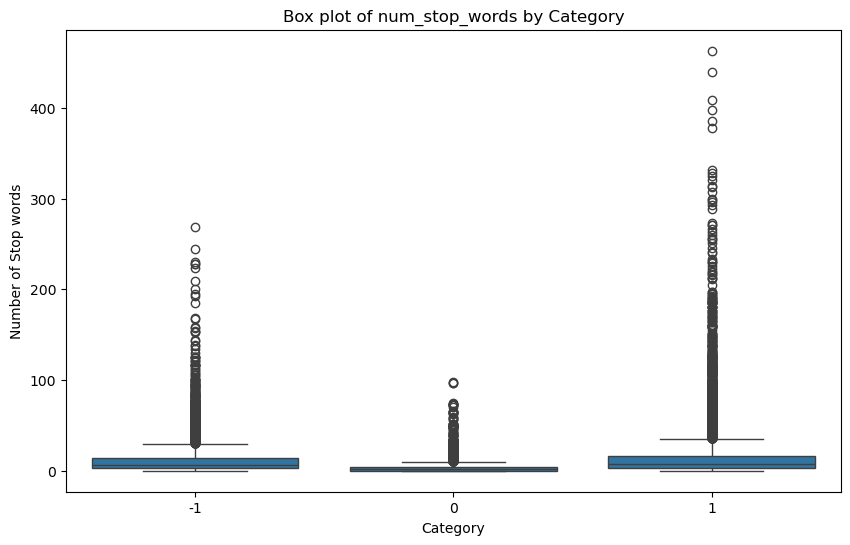

In [193]:
# Category wise boxplot of word_count
# create the figure and axes
plt.figure(figsize = (10,6))

sns.boxplot(data = df, x = 'category', y = 'num_stop_words')

# Add titles and labels
plt.title('Box plot of num_stop_words by Category')
plt.xlabel('Category')
plt.ylabel('Number of Stop words')

# Show the plot
plt.show()

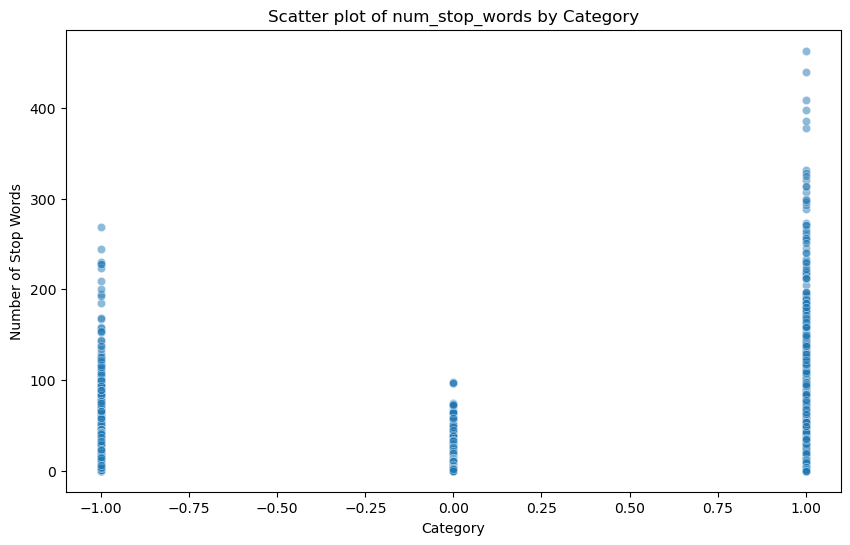

In [191]:
# Category wise Scatterplot of word_count
# create the figure and axes
plt.figure(figsize = (10,6))

sns.scatterplot(data = df, x = 'category', y = 'num_stop_words', alpha = 0.5)

# Add titles and labels
plt.title('Scatter plot of num_stop_words by Category')
plt.xlabel('Category')
plt.ylabel('Number of Stop Words')

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

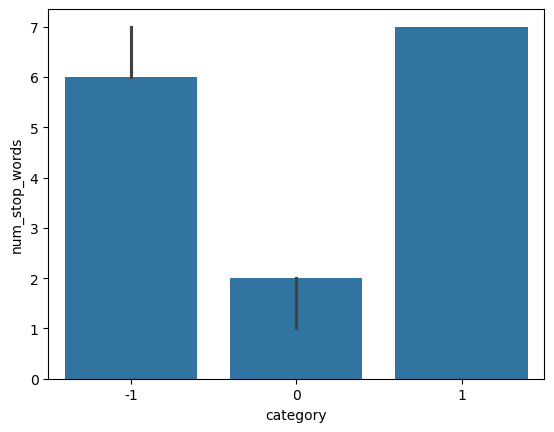

In [187]:
# Median word counts among sentiments
sns.barplot(df, x = 'category', y = 'num_stop_words', estimator = 'median')

In [201]:
# Stopwords ka count dekhte hai 
# Creata a frequency distribution of stop words in clean_comment column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for Plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns = ['stop_word', 'count'])

/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_43124/1736753516.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_25_df, x = 'count', y = 'stop_word', palette = 'viridis')


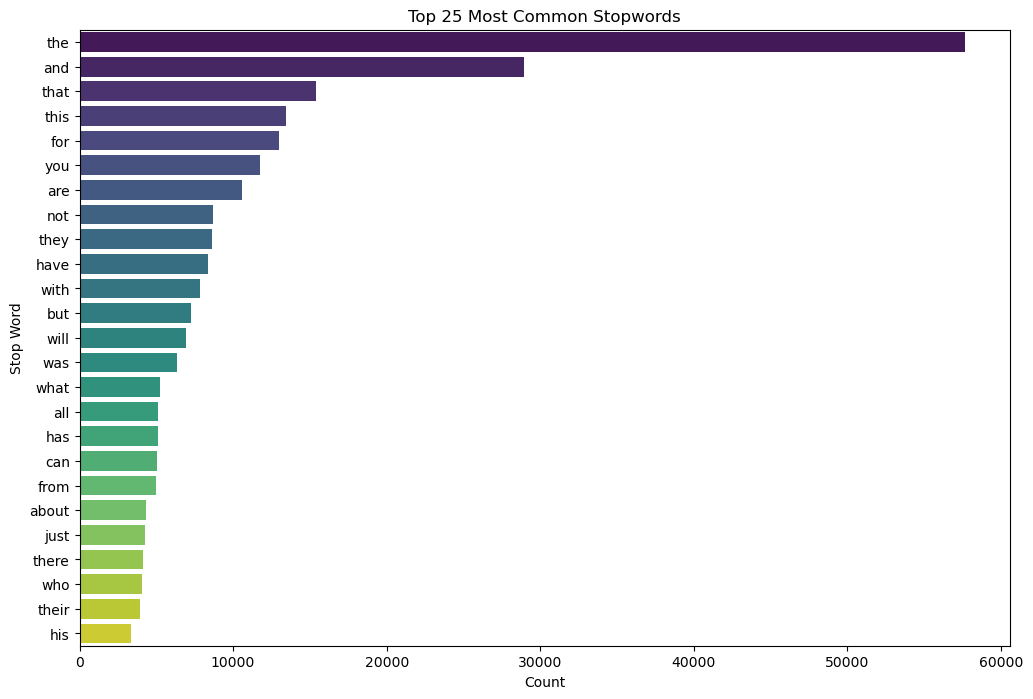

In [203]:
# Create the barplot for the top 25 most common stop words

plt.figure(figsize = (12,8))
sns.barplot(data = top_25_df, x = 'count', y = 'stop_word', palette = 'viridis')
plt.title('Top 25 Most Common Stopwords')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

- Not lagbhag 10k times aaya hai and agar isko hata diya to kayi baar meaning hi badal jayega comment ka
- Similarly But ke sath v yahi issue hai

# Characters

In [207]:
df['num_chars'] = df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [209]:
df['num_chars'].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

In [217]:
# Finding ki har character data me kitni baar aaya hai
from collections import Counter

# Combine all comments into one large string
all_text = ''.join(df['clean_comment'])

# Count the frequency of each charater
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), 
                                 columns = ['character', 'frequency']).sort_values(by = 'frequency', ascending=False)

In [223]:
char_frequency_df.head(10)

,character,frequency
6,,1054800
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [229]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '援', '哭', '悼'], dtype=object)

In [234]:
char_frequency_df.tail(50)

,character,frequency
419,ൾ,1
973,挂,1
421,സ,1
970,荷,1
429,ശ,1
430,ൻ,1
967,满,1
965,需,1
434,œ,1
612,症,1


- Bahut saare special characters v use hue hai in comments
- Many non english characters jinki frequency v bahut kam hai

In [241]:
# create a new column 'num_punctuation_chars' to count punctuation wale characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?:;"\(){}-']))
df.sample(5)

<>:3: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\('
/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_43124/2781352524.py:3: SyntaxWarning: invalid escape sequence '\('
  lambda x: sum([1 for char in x if char in '.,!?:;"\(){}-']))


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
21073,only saddam and iran could negotiated some sor...,0,18,5,110,0
3990,lord sir chetan bhagat aaj tak speaking well t...,0,9,0,51,0
13107,may saraswati continue shower her blessings yo...,0,11,2,73,0
17684,just like the clinton foundation gettin paid ’...,1,15,4,90,0
15693,gdp low unemployment high corruption high law ...,1,18,4,108,0


In [245]:
df['num_punctuation_chars'].value_counts()

num_punctuation_chars
0     36595
1       100
2        52
3        14
4        13
6         7
5         5
20        1
10        1
11        1
14        1
23        1
7         1
13        1
Name: count, dtype: int64

In [249]:
# Removing punctuation marks from comments
punc_str = '.,!?:;"\(){}-'

for i in punc_str:
    df['clean_comment'] = df['clean_comment'].str.replace(i, '')

<>:2: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_43124/3461942289.py:2: SyntaxWarning: invalid escape sequence '\('
  punc_str = '.,!?:;"\(){}-'


In [253]:
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?:;"\(){}-']))
df.sample(5)
df['num_punctuation_chars'].value_counts()

<>:2: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_43124/1218745458.py:2: SyntaxWarning: invalid escape sequence '\('
  lambda x: sum([1 for char in x if char in '.,!?:;"\(){}-']))


num_punctuation_chars
0    36793
Name: count, dtype: int64

# Bigrams

In [277]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract top 25 bigrams
def get_top_ngrams(corpus, n = None):
    vec = CountVectorizer(ngram_range = (2, 2), stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1] , reverse = True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_43124/3064199817.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_25_bigrams_df, x = 'count', y = 'bigram', palette = 'magma')


Text(0, 0.5, 'Bigram')

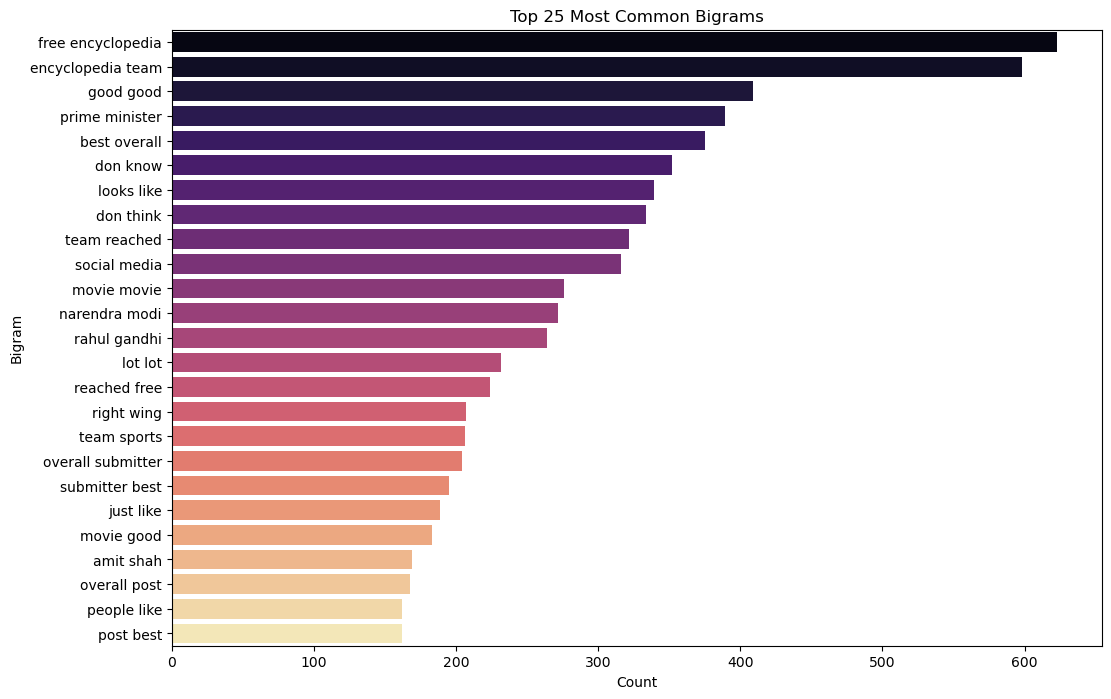

In [278]:
# Convert the bigrams into a dataframe for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns = ['bigram', 'count'])

# Future me apan bigrams pe v model bana skte hai so waha kaam aayega


# Plot the counterpliot for the top 25 bigrams
plt.figure(figsize = (12, 8))
sns.barplot(data = top_25_bigrams_df, x = 'count', y = 'bigram', palette = 'magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')

- Ek observation ye hai ki data me don't know ke jagah and don't think ke jagah don know aur don think likha hua hau
- may be jaha se data liye hai unlog ne hi preprocessing me mistake kiya hoga
- Isko consider krna padega

# trigrams

In [283]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract top 25 trgrams
def get_top_trigrams(corpus, n = None):
    vec = CountVectorizer(ngram_range = (3, 3), stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1] , reverse = True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_43124/2657748932.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_25_trigrams_df, x = 'count', y = 'trigram', palette = 'magma')


Text(0, 0.5, 'Trigram')

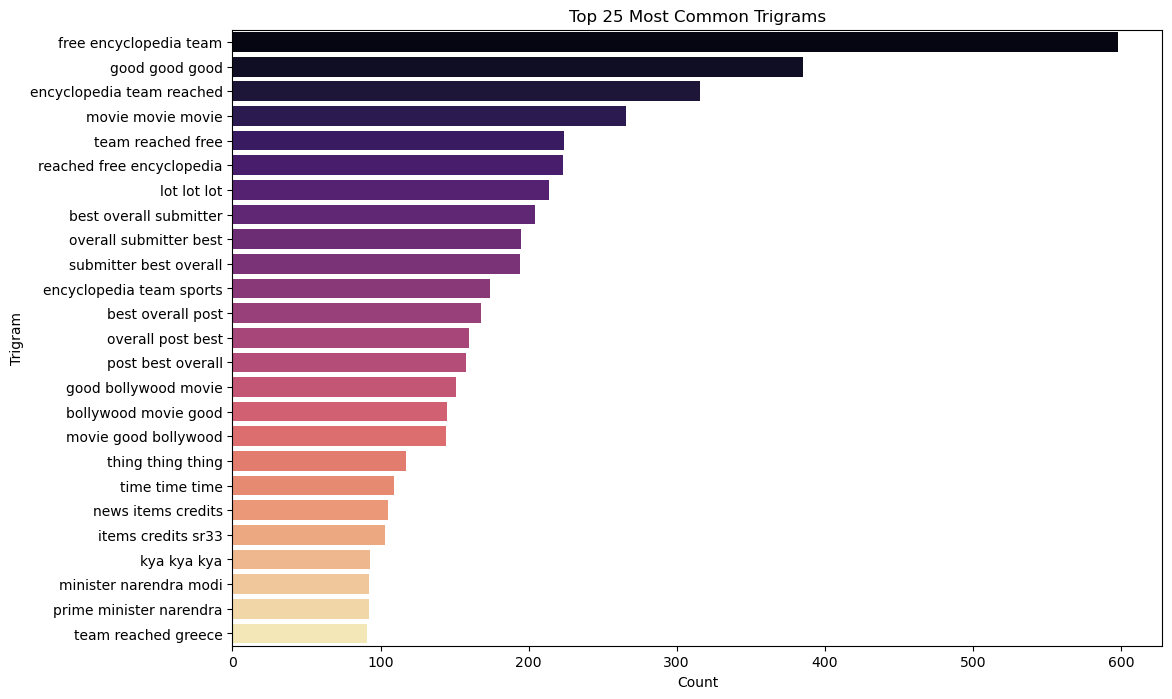

In [284]:
# Convert the bigrams into a dataframe for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns = ['trigram', 'count'])

# Future me apan trigrams pe v model bana skte hai so waha kaam aayega

# Plot the counterpliot for the top 25 bigrams
plt.figure(figsize = (12, 8))
sns.barplot(data = top_25_trigrams_df, x = 'count', y = 'trigram', palette = 'magma')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')

# Further Preprocessing

In [288]:
# Removing Non english words and characters
# Keeping only Standard English letters, digits, and common punctuatio
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x : re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [292]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns = ['character', 'frequency']).sort_values(
    by = 'frequency', ascending = False)

char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [294]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [302]:
# Stopwords removal -> except for essential one jo ki meaning hi badal dete hai like not, but
from nltk.corpus import stopwords
# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stopwords from clean_comment column retaining the essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [312]:
df['clean_comment'].sample(10)

24863    correct wrong geologists but nick zentner told...
917      brilliant post but not hopeful single nerve ce...
20891    parents fucking assholes want muslims dead hat...
34766                               duniya sabse bada lodu
5840          government congress plus cow ouch gotta hurt
21683                             always reaching new lows
11483    news items credits sr33 new delhi team reached...
1652     highest ever voter turnout 2014 elections beat...
14694    fact one dares kind things says great deal cou...
28111        motherfucker nehru gandhi family cancer india
Name: clean_comment, dtype: object

# Lemmatization

In [320]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Define the lemmetizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/sk/nltk_data...


In [324]:
# Apply lemmeatization to the clean_comment_no_stopwords column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [332]:
df['clean_comment'][500]

'hourou musuko nice seeing but doubt people saw read shame excellent sol tackle hard hitting subject gender identity'

# Further EDA

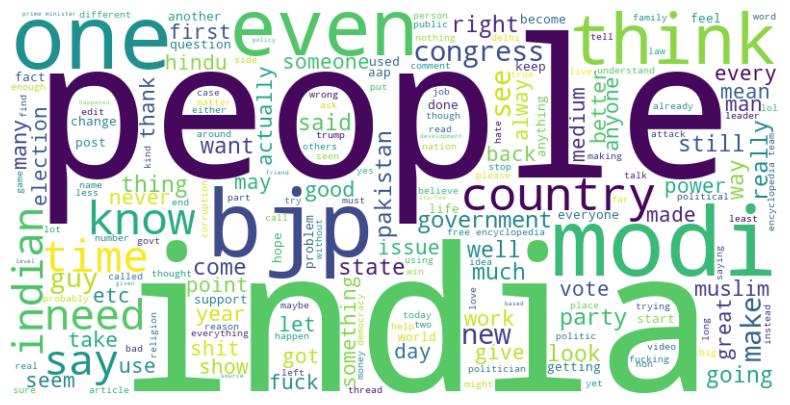

In [339]:
# Wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(' '.join(text))
    plt.figure(figsize = (10, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()
plot_word_cloud(df['clean_comment'])

Observation
- Data me political biasness lag rha
- So aise youtube channel jisme political baat ho to achha reslut dega but other genre me may be bad result

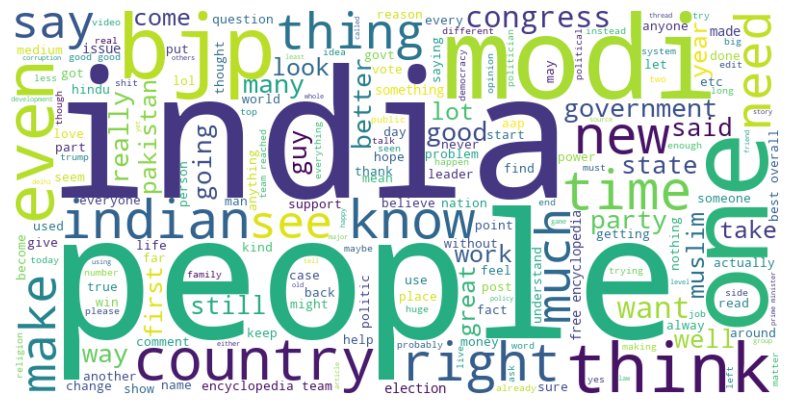

In [342]:
# Positive sentiment wale comments ka wordcloud
plot_word_cloud(df[df['category'] == 1]['clean_comment'])

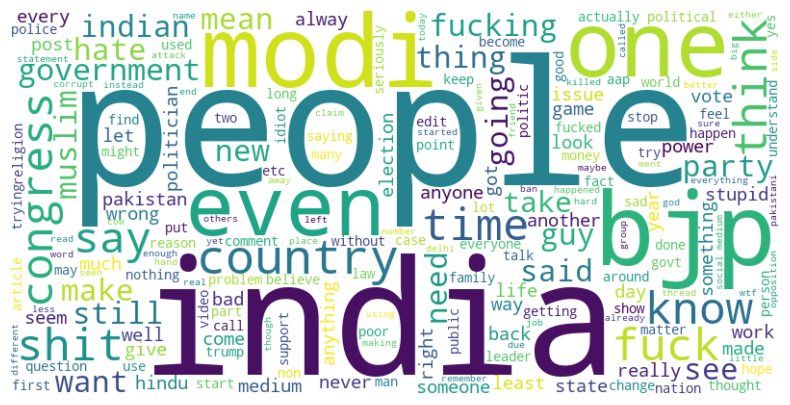

In [344]:
# Negative sentiment wale comments ka wordcloud
plot_word_cloud(df[df['category'] == -1]['clean_comment'])

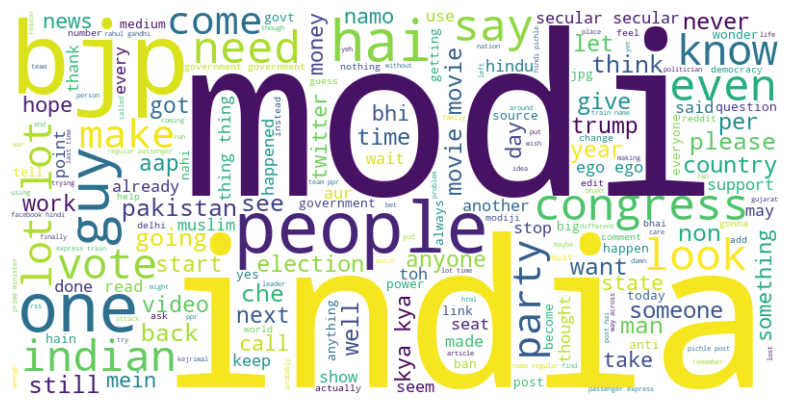

In [346]:
# Neutral sentiment wale comments ka wordcloud
plot_word_cloud(df[df['category'] == 0]['clean_comment'])

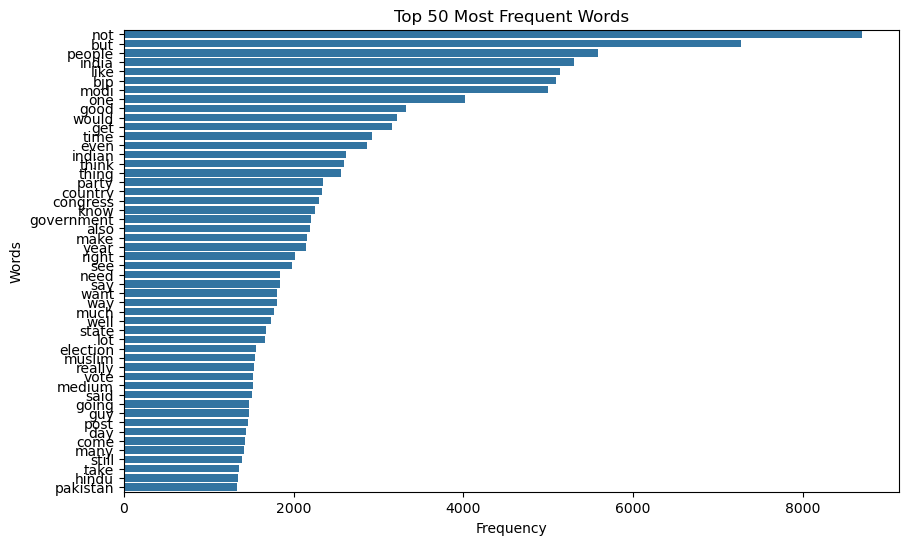

In [350]:
# Top 50 most frequently used words in our dataset

def plot_top_n_words(df, n = 20):
    """ Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # get the top N most common words
    counter  = Counter(words)
    most_common_words = counter.most_common(n)

    #Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N Words
    plt.figure(figsize = (10,6))
    sns.barplot(x = list(counts), y = list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()
# Example usage
plot_top_n_words(df, n = 50)

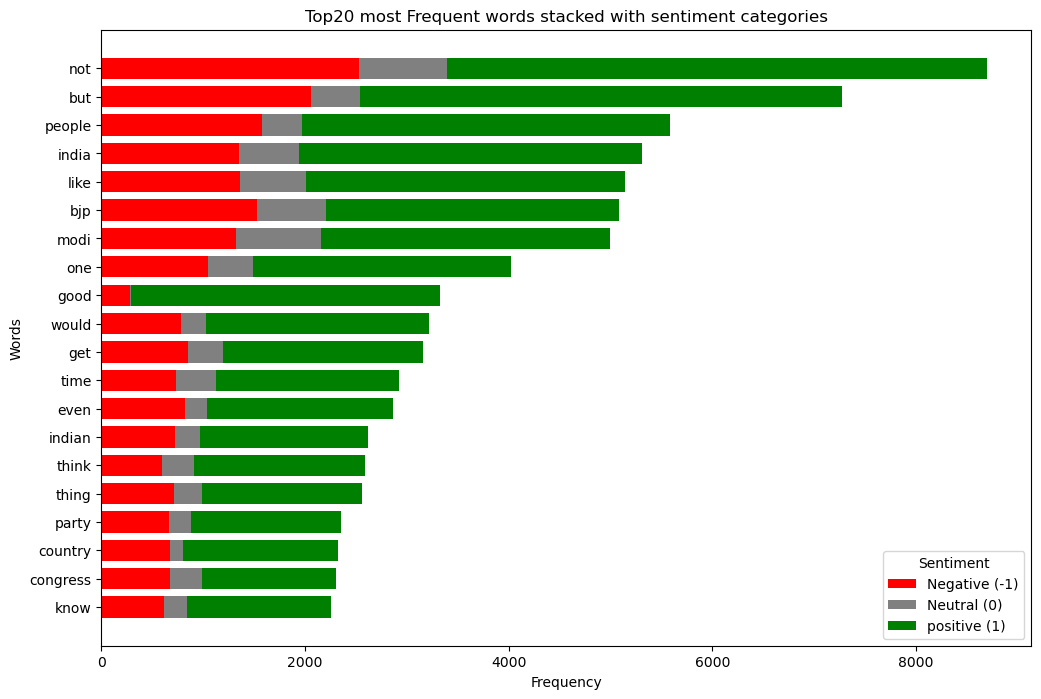

In [369]:
# Category wise Top n words
def plot_top_n_words_by_category(df, n = 20, start = 0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the  content column and count their occurences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category'] # Assuming 'category' column exists for -1,0,1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = {-1:0,
                                              0:0,
                                              1:0} # Initilaize counts for each category
                
            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1
    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}
    
    # get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key = lambda x: x[1], reverse = True)[start:start + n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]
    
    # plot the stacked bar chart
    plt.figure(figsize = (12, 8))
    bar_width = 0.75
    
    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color = 'red', label = 'Negative (-1)', height = bar_width)
    plt.barh(word_labels, neutral_counts, left = negative_counts, color = 'grey', label = 'Neutral (0)', height = bar_width)
    plt.barh(word_labels, positive_counts, left = [i+j for i,j in zip(negative_counts, neutral_counts)], color = 'green',
    label = 'positive (1)', height = bar_width)
    
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top{n} most Frequent words stacked with sentiment categories')
    plt.legend(title = 'Sentiment', loc = 'lower right')
    plt.gca().invert_yaxis() # invert y axis to show the highest frequency at the top
    plt.show()

plot_top_n_words_by_category(df, n = 20)